In [41]:
# spacy will be used for lemmatization and stop words removal it's better than nltk
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable


In [42]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Data analysis 
import pandas as pd
import numpy as np 

# Data plotting
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size' : 16})

import seaborn as sn
from wordcloud import WordCloud

# Text analysis
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import emoji
import emot
import contractions
import string
import nltk
from nltk.stem import SnowballStemmer 
from nltk.tokenize import word_tokenize

# Modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Save model
import joblib

import time

# Loading data

In [3]:
reviews = pd.read_csv('/home/verpen/Downloads/Datasets/Amazon_Reviews_4M/train.csv')

In [4]:
reviews

,Review,Label
0,Stuning even for the non-gamer: This sound tra...,2
1,The best soundtrack ever to anything.: I'm rea...,2
2,Amazing!: This soundtrack is my favorite music...,2
3,Excellent Soundtrack: I truly like this soundt...,2
4,"Remember, Pull Your Jaw Off The Floor After He...",2
...,...,...
3599995,Don't do it!!: The high chair looks great when...,1
3599996,"Looks nice, low functionality: I have used thi...",1
3599997,"compact, but hard to clean: We have a small ho...",1
3599998,what is it saying?: not sure what this book is...,1


# Data analysis


### Analysis of the dataset

In [5]:
# Check if null values exist
reviews.isnull().value_counts()

Review  Label
False   False    3600000
dtype: int64

In [6]:
# Number of positive and negative reviews
reviews['Label'].value_counts()

2    1800000
1    1800000
Name: Label, dtype: int64

In [7]:
# Choose a random subset from the dataset with equal number of 
# positive and negative tweets
subset = 250000
pos_subset = reviews[reviews['Label'] == 2].sample(subset, random_state = 43)
neg_subset = reviews[reviews['Label'] == 1].sample(subset, random_state = 43)

modified_data = pd.concat([pos_subset, neg_subset])

In [8]:
modified_data.sample(5)

,Review,Label
3266950,Candy Fun: This is a wonderful story about the...,2
3187674,Not worth the money.: I've owned this for 3 ye...,1
2571792,Not A Good Book: This book does not help the s...,1
1331969,"Hamilton Folding Stand, Chrome Finish, 3 secti...",1
425283,70's Reggae Roots Rhythms Re-Mastered!: This m...,2


# Data Preprocessing

In [9]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "1st" : "first", 
    "2nd" : "second", 
    "3rd" : "third",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "canx" : "cancel",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dnt" : "don't",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "emerg" : "emergency",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "haha" : "laugh", 
    "hahaha" : "laugh", 
    "hehe" : "laugh", 
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrs" : "hour",
    "hrh" : "his royal highness",    
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pls" : "please",
    "plz" : "please",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rite" : "right",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sry" : "sorry",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thank" : "thank",
    "thanks" : "thank",
    "thks" : "thank",
    "tho" : "though",
    "thx" : "thank",
    "tia" : "thanks in advance",
    "til" : "until",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "us" : "united states",
    "usa" : "united states",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "ya" : "you",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

# This abbreviation list is by @nmaguette from Kaggle

In [10]:
def expand_abbreviation(text):
    """ This function takes an abbreviated string
        and returns the expanded version with whitespace 
        replaced by underscore """
    
    expanded_abbr = ''
    expanded_text = ''
    for word in text:
        expanded_abbr = word
        if word in abbreviations: 
            expanded_abbr = abbreviations[word]
            expanded_abbr = expanded_abbr.replace(' ', '_')          
        
        expanded_text = expanded_text + expanded_abbr + " "
    
    return expanded_text

In [11]:
emot_obj = emot.core.emot()  

In [12]:
def emoj_emot_to_text(text):
    """ This function converts emojis and emoticons to corresponding text """
    
    # Emoticons  
    emoticons_list = emot_obj.emoticons(text)['mean']
    for emoticon in emoticons_list: 
        emoticon = emoticon.replace(', ', ' ')
        emoticon = emoticon.replace(' ', '_')
        text = text + emoticon + " "       
    
    
    # Emojis
    text = emoji.demojize(text) 
    text = re.sub(':', '', text)
    return text

In [13]:
stop_words = list(STOP_WORDS)

# Exclude from stop words list the following negative words
stop_words.remove('not')
stop_words.remove('never')
stop_words.remove('none')
stop_words.remove('noone')
stop_words.remove('neither')
stop_words.remove('cannot')

In [14]:
def remove_trivial_words(text):  
    """ This function Removes stopwords and words with length of one character or two """
    
    temp = ""
    for word in text.split():
        if  word not in stop_words:
            if len(word) != 1 and len(word) != 2:
                temp += word + " "
    return temp

In [15]:
# Stemming
snowballStemmer = SnowballStemmer(language='english') 

def preprocess_texts(text): 
    
    #     Preprocess texts
    text = text.lower() # Convert to lower case
    text = contractions.fix(text) # Remove contractions
    
    #     Remove insignificant characters using regex
    text = re.sub('\S+@\S+.\S+', '', text) # Remove emails
    text = re.sub('@[\S]+', '', text) # Remove mentions starting with @       
    text = re.sub('(http|https):\/\/[\S]*', '', text) # Remove links starting with http or https
    text = re.sub('#+\S*|\.+', '', text) # Remove Hashtags and dots
    text = re.sub(r'(.)\1{2,}', r'\1', text) # Remove characters repetition
    text = re.sub(r'&[\S]+;', '', text) # Remove html tags, such as &amp;  
    text = re.split('(\W+)', text) # Insert a space between characters and punctuations
       
    # Expand abbreviations
    text = expand_abbreviation(text)   
    
    # Emojis and Emoticons
    text = emoj_emot_to_text(text)      
    
    text = re.sub('\W', ' ', text)  # Remove remaining punctuations  
    text = re.sub('\d', '', text)  # Remove Numbers    
   
    # Remove trivial words
    text = remove_trivial_words(text)
    
    # Stemming    
    stemmed_token_list = [] 
    for token in text.split(): 
        stemmed_token_list.append(snowballStemmer.stem(token))

    return stemmed_token_list #Return processed text as a list

In [16]:
modified_data['Tokens'] = modified_data['Review'].apply(preprocess_texts)

In [17]:
modified_data

,Review,Label,Tokens
1297520,Good novel about gay youth: There are two book...,2,"[good, novel, gay, youth, book, gay, romanc, f..."
966607,"Tudors Season I: This series is ""Awesome!"" It ...",2,"[tudor, season, seri, awesom, addict, start, w..."
3056855,Ah the memories.: What can be said about Rocko...,2,"[memori, said, rocko, modern, life, bizarr, lo..."
2561053,Cancer is not a Disese by Andreas Moritz: A ve...,2,"[cancer, not, dises, andrea, moritz, refresh, ..."
3093561,better late than never: I more or less stumble...,2,"[better, late, never, stumbl, novel, fact, enj..."
...,...,...,...
869689,too expensive: nearly 5 US$ for 2 pieces of ha...,1,"[expens, near, united_st, piec, hanuta, pay, s..."
1298374,Disappointing: Starts out whimsical and ends u...,1,"[disappoint, start, whimsic, end, self, consci..."
2987905,"lots of errors!!!: i never write reviews, but ...",1,"[lot, error, never, write, review, annoy, stud..."
133275,CD not working: I had bought this Cd as a Chri...,1,"[not, work, bought, christma, gift, son, play,..."


In [18]:
# Convert token lists to string 
def convert_list_str(tokens):
    return ' '.join(tokens)
modified_data['String_tokens'] = modified_data['Tokens'].apply(convert_list_str)
modified_data = modified_data.reset_index(drop=True)
modified_data

,Review,Label,Tokens,String_tokens
0,Good novel about gay youth: There are two book...,2,"[good, novel, gay, youth, book, gay, romanc, f...",good novel gay youth book gay romanc fiction c...
1,"Tudors Season I: This series is ""Awesome!"" It ...",2,"[tudor, season, seri, awesom, addict, start, w...",tudor season seri awesom addict start way stop...
2,Ah the memories.: What can be said about Rocko...,2,"[memori, said, rocko, modern, life, bizarr, lo...",memori said rocko modern life bizarr look life...
3,Cancer is not a Disese by Andreas Moritz: A ve...,2,"[cancer, not, dises, andrea, moritz, refresh, ...",cancer not dises andrea moritz refresh new loo...
4,better late than never: I more or less stumble...,2,"[better, late, never, stumbl, novel, fact, enj...",better late never stumbl novel fact enjoy fant...
...,...,...,...,...
499995,too expensive: nearly 5 US$ for 2 pieces of ha...,1,"[expens, near, united_st, piec, hanuta, pay, s...",expens near united_st piec hanuta pay supermarket
499996,Disappointing: Starts out whimsical and ends u...,1,"[disappoint, start, whimsic, end, self, consci...",disappoint start whimsic end self conscious du...
499997,"lots of errors!!!: i never write reviews, but ...",1,"[lot, error, never, write, review, annoy, stud...",lot error never write review annoy studi book ...
499998,CD not working: I had bought this Cd as a Chri...,1,"[not, work, bought, christma, gift, son, play,...",not work bought christma gift son play obo tim...


# Analyze data after processing

In [19]:
# Count the number of tokens in the dataset after processing
num_unique_tokens = 0
num_of_total_tokens = 0
num_pos_tokens = 0
num_neg_tokens = 0
pos_tokens = []
neg_tokens = []
rows = modified_data.shape[0]

for i in range(rows):
    if modified_data['Label'][i] == 1:
        for token in modified_data['Tokens'][i]:
            neg_tokens.append(token)    
    else:
        for token in modified_data['Tokens'][i]:
            pos_tokens.append(token)     

num_pos_tokens = len(pos_tokens)
num_neg_tokens = len(neg_tokens)
num_of_total_tokens = num_pos_tokens + num_neg_tokens
num_unique_tokens = len(set(pos_tokens)) + len(set(neg_tokens))

print(f"""Number of tokens: {num_of_total_tokens}
Number of unique tokens: {num_unique_tokens}
Positive Tokens: {num_pos_tokens}
Negative Tokens: {num_neg_tokens}
Positive Unique Tokens: {len(set(pos_tokens))}
Negative Unique Tokens: {len(set(neg_tokens))}""")

Number of tokens: 17617873
Number of unique tokens: 414647
Positive Tokens: 8539391
Negative Tokens: 9078482
Positive Unique Tokens: 210961
Negative Unique Tokens: 203686


In [20]:
# Calculate words occurances 
def occurances_of_words(data, reverse=True):
    freq_words_dic = {}
    rows = data.shape[0]
    
    for i in range(rows):
        for word in data['Tokens'][i]:
            if word in freq_words_dic:
                freq = freq_words_dic[word]
                freq_words_dic[word] = freq + 1
            else:
                freq_words_dic[word] = 1
    return sorted(freq_words_dic.items(), key=lambda x: x[1], reverse=reverse)

In [21]:
# Calculate words occurances in negative reviews
neg_modified_data = modified_data[modified_data['Label'] == 1]
neg_modified_data = neg_modified_data.reset_index(drop=True)

neg_freq_words = occurances_of_words(neg_modified_data)
sorted(neg_freq_words, key=lambda x: x[1], reverse=True)[:20]

[('not', 388905),
 ('book', 149051),
 ('like', 83551),
 ('time', 62328),
 ('work', 60903),
 ('good', 60383),
 ('read', 58241),
 ('movi', 52031),
 ('buy', 49985),
 ('product', 46092),
 ('look', 38912),
 ('money', 37862),
 ('tri', 36584),
 ('disappoint', 35828),
 ('use', 35775),
 ('want', 34517),
 ('great', 33945),
 ('bad', 33928),
 ('better', 32551),
 ('bought', 30575)]

In [22]:
# Calculate words occurances in positive reviews
pos_modified_data = modified_data[modified_data['Label'] == 2]
pos_modified_data = pos_modified_data.reset_index(drop=True)

pos_freq_words = occurances_of_words(pos_modified_data)
sorted(pos_freq_words, key=lambda x: x[1], reverse=True)[:20]

[('not', 183281),
 ('book', 160417),
 ('great', 115630),
 ('good', 82677),
 ('like', 78538),
 ('read', 75310),
 ('love', 73562),
 ('time', 55311),
 ('work', 47085),
 ('movi', 45027),
 ('best', 44371),
 ('album', 36631),
 ('year', 34544),
 ('stori', 34381),
 ('use', 33190),
 ('song', 32085),
 ('look', 31464),
 ('recommend', 30224),
 ('music', 30050),
 ('want', 29199)]

In [23]:
def plot_freq_words(freq_words_list, label, color):
    """ Plot a bar chart with the most frequent words """

    freq_words = [f_item[0] for f_item in freq_words_list]
    occurances = [s_item[1] for s_item in freq_words_list]    
    
    # X ticks position
    x_pos = [x*2 for x in range(20)]
    
    plt.figure(figsize=(12, 7))
    plt.bar(x_pos, occurances, align='center', width=1.5, alpha=0.8, color=color, label=label)
    plt.xlabel('Most Frequent Words')
    plt.ylabel('Number of occurances')
    plt.legend()
    plt.xticks(x_pos, freq_words, rotation='vertical')
    plt.show()

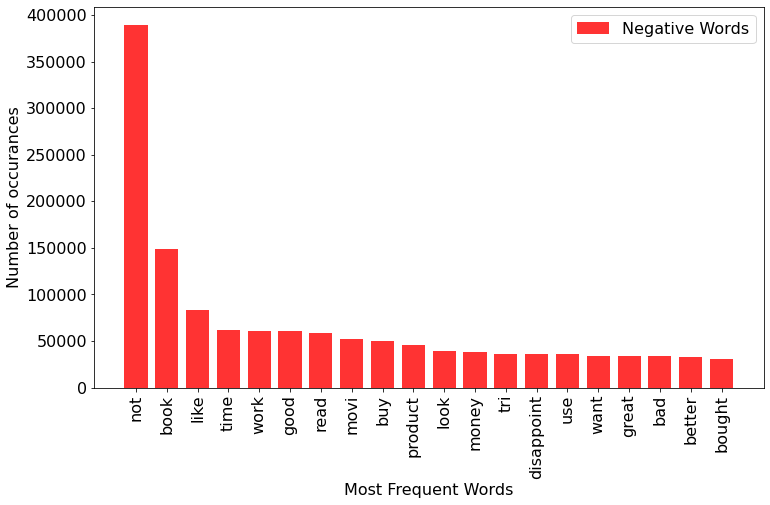

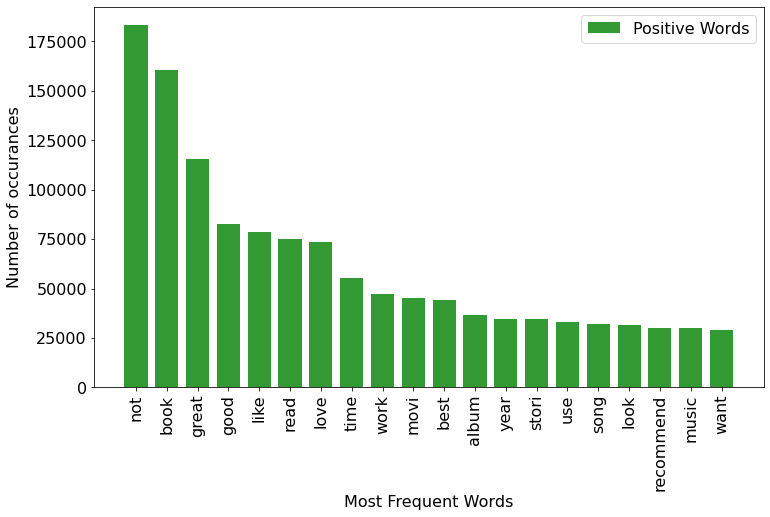

In [24]:
# Plot a bar chart for neg words
plot_freq_words(neg_freq_words[:20], 'Negative Words', 'red')

# Plot a bar chart for pos words
plot_freq_words(pos_freq_words[:20], 'Positive Words', 'green')

In [25]:
# Display a word cloud
def plot_wordcloud(text, words):

    wc = WordCloud(width = 1920, height = 1080, background_color = 'black', max_words = words, colormap='Set2')
    wc.generate(text)    
    
    plt.figure(figsize=(10,10), facecolor="black")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.imshow(wc, interpolation='bilinear')
    plt.show()

In [26]:
# Extract frequent words 
wc_neg_text = [word[0] for word in neg_freq_words]
wc_neg_text = ' '.join(wc_neg_text)

wc_pos_text = [word[0] for word in pos_freq_words]
wc_pos_text = ' '.join(wc_pos_text)

Negative Frequent Words: 


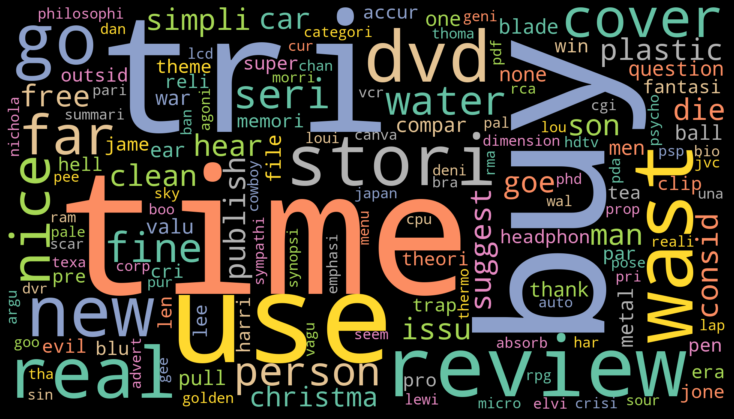


Positive Frequent Words: 


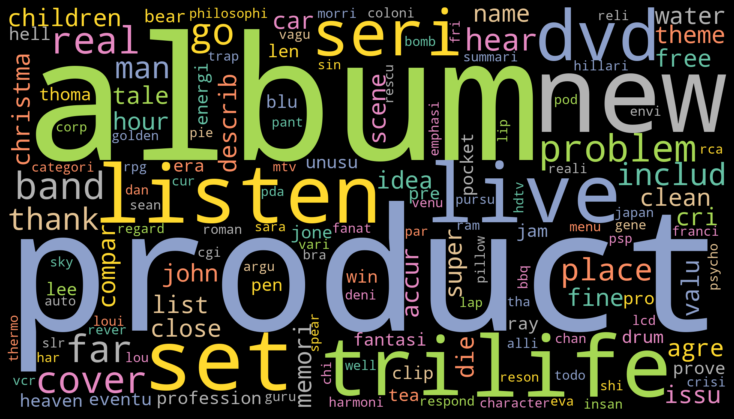

In [27]:
max_words = 150
print('Negative Frequent Words: ')
plot_wordcloud(wc_neg_text, max_words)

print('\nPositive Frequent Words: ')
plot_wordcloud(wc_pos_text, max_words)

# Feature Extraction and Model Training

In [28]:
max_features = 1_000_000
X_train, y_test = train_test_split(modified_data, test_size=0.2, random_state = 0)
print(f'Splitted data: \nTrain Dimensions: {X_train.shape}\nTest Dimensions: {y_test.shape}\n')

tfidf = TfidfVectorizer(ngram_range=(1, 1), max_features = max_features)
tfidf.fit(X_train['String_tokens'])
trained_tfidf = tfidf.transform(X_train['String_tokens'])
test_tfidf = tfidf.transform(y_test['String_tokens'])
print(f'Fitted data: \nTrain Dimensions: {trained_tfidf.shape}\nTest Dimensions: {test_tfidf.shape}')

Splitted data: 
Train Dimensions: (400000, 4)
Test Dimensions: (100000, 4)

Fitted data: 
Train Dimensions: (400000, 288555)
Test Dimensions: (100000, 288555)


## Logistic Regression

In [29]:
log_model = LogisticRegression(max_iter=1000, solver = 'saga', multi_class = 'multinomial', C = 3.0)
log_model.fit(trained_tfidf, X_train['Label'])
log_model.score(test_tfidf, y_test['Label'])

0.88576

## Linear SVM

In [30]:
svm_model_linear = LinearSVC()
svm_model_linear.fit(trained_tfidf, X_train['Label'])
svm_model_linear.score(test_tfidf, y_test['Label'])

0.88245

## Decision Tree

In [31]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(trained_tfidf, X_train['Label'])
dtree_model.score(test_tfidf, y_test['Label'])

0.77345

## Random Forest

In [32]:
rforest_model = RandomForestClassifier()
rforest_model.fit(trained_tfidf, X_train['Label'])
rforest_model.score(test_tfidf, y_test['Label'])

0.8701

## Naive Bayes - MultinomialNB

In [33]:
nb_multinomial_model = naive_bayes.MultinomialNB()
nb_multinomial_model.fit(trained_tfidf, X_train['Label'])
nb_multinomial_model.score(test_tfidf, y_test['Label'])

0.82953

## Naive Bayes - BernoulliNB

In [34]:
nb_bernoulli_model = naive_bayes.BernoulliNB()
nb_bernoulli_model.fit(trained_tfidf, X_train['Label'])
nb_bernoulli_model.score(test_tfidf, y_test['Label'])

0.84448

# Testing the model 

In [36]:
def pipeline(model, test_data):
    
    # Preprocessing
    print("Processing texts....")
    start = time.perf_counter()
    test_data['processed_texts'] = test_data['Review'].apply(preprocess_texts)
    test_data['string_texts'] = test_data['processed_texts'].apply(convert_list_str)
    end = time.perf_counter()    
    print(f'Processing time: {end - start}')
    
    # Transforming processed text using tfidf vectorizer initiated and fitted above
    print("Transforming texts to features....")
    test_tfidf = tfidf.transform(test_data['string_texts'])
    
    # Predict
    print("Predicting....")
    predictions = model.predict(test_tfidf)
    
    # Print a Classification report
    print(classification_report(test_data['Label'], predictions))
    cm = confusion_matrix(test_data['Label'], predictions, labels=[1, 2])
    print(cm)
    
    # Plot a heatmap
    plt.figure(figsize= (10, 7))
    sn.heatmap(cm, annot=True, fmt='.0f')
    plt.xlabel('Predicted')
    plt.ylabel('value')
    plt.show()
    
    # Plot a pie 
    (unique, counts) = np.unique(predictions, return_counts=True)
    print(f'Unique: {unique}\t\tCounts: {counts}')
    
    neg_texts_counts = counts[0]
    pos_texts_counts = counts[1]
    labels = ["Negative", "Positive"]
    plt.pie(counts, labels=labels, shadow=True, autopct="%1.2f%%")

# Model testing with Amazon Reviews dataset

In [37]:
# Another test
amazon_reviews = pd.read_csv('/home/verpen/Downloads/Datasets/Amazon_Reviews_4M/test.csv') # 400k reviews
amazon_reviews = amazon_reviews.sample(100000)
amazon_reviews = amazon_reviews.reset_index(drop=True)
amazon_reviews

,Review,Label
0,"The Gadget is it ""Too Good"": The Gadget by Pau...",2
1,Terrible movie: The movie is full of gratutiou...,1
2,"good: this is a decent book to read, that help...",2
3,1 Star I'm Thinking 0 Stars: Blee! WHAT I PAYE...,1
4,"Horrible, disgusting feature: I hated this mov...",1
...,...,...
99995,FARCE!: Where is the medical research that bac...,1
99996,Good beginner book: This is a great book for s...,2
99997,Fan de los Beatles: Muy buena recopilación de ...,2
99998,What a Shame: It's a shame this movie has only...,1


Processing texts....
Processing time: 212.56390789100078
Transforming texts to features....
Predicting....
              precision    recall  f1-score   support

           1       0.89      0.88      0.88     50216
           2       0.88      0.89      0.88     49784

    accuracy                           0.88    100000
   macro avg       0.88      0.88      0.88    100000
weighted avg       0.88      0.88      0.88    100000

[[44225  5991]
 [ 5626 44158]]


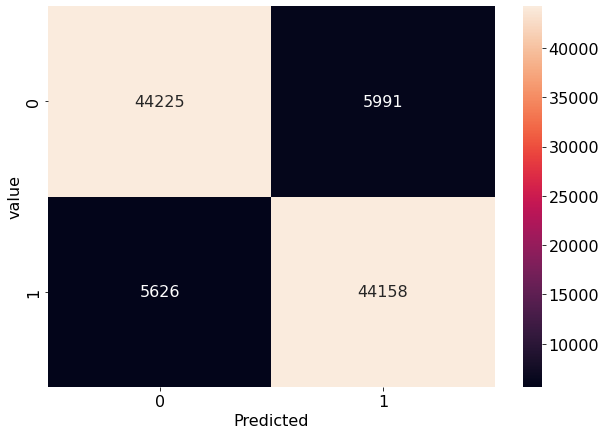

Unique: [1 2]		Counts: [49851 50149]


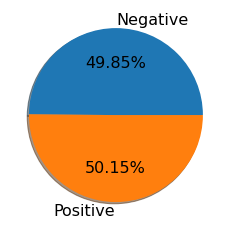

In [38]:
pipeline(svm_model_linear, amazon_reviews)

# Model testing with IMDb Movie Reviews dataset

In [39]:
movie_reviews = pd.read_csv('/home/verpen/Downloads/Datasets/imdb/IMDb_Moview_Reviews.zip')
movie_reviews = movie_reviews.rename(columns={'review':'Review', 'sentiment': 'Label'})
movie_reviews

,Review,Label
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [40]:
movie_reviews['Label'] = movie_reviews['Label'].apply(lambda x: 2 if x == 'positive' else 1)
movie_reviews

,Review,Label
0,One of the other reviewers has mentioned that ...,2
1,A wonderful little production. <br /><br />The...,2
2,I thought this was a wonderful way to spend ti...,2
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",2
...,...,...
49995,I thought this movie did a down right good job...,2
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",1
49997,I am a Catholic taught in parochial elementary...,1
49998,I'm going to have to disagree with the previou...,1


Processing texts....
Processing time: 135.23736722100148
Transforming texts to features....
Predicting....
              precision    recall  f1-score   support

           1       0.84      0.88      0.86     25000
           2       0.87      0.83      0.85     25000

    accuracy                           0.85     50000
   macro avg       0.86      0.85      0.85     50000
weighted avg       0.86      0.85      0.85     50000

[[21963  3037]
 [ 4243 20757]]


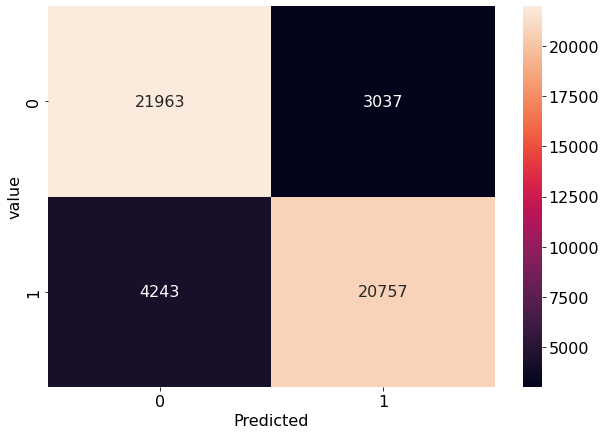

Unique: [1 2]		Counts: [26206 23794]


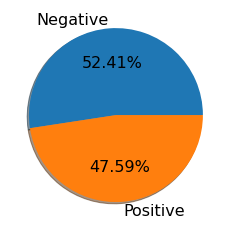

In [41]:
pipeline(svm_model_linear, movie_reviews)

## Model testing with Pang's Movie Reviews dataset

In [42]:
# https://github.com/anurag3290/IMDB-Sentiment-Analysis
pang_movies_1 = pd.read_csv('/home/verpen/Downloads/Datasets/Pang/Dataset/IMDB-Sentiment-Analysis-master/movie_review_train.csv')
pang_movies_2 = pd.read_csv('/home/verpen/Downloads/Datasets/Pang/Dataset/IMDB-Sentiment-Analysis-master/movie_review_test.csv')
pang_movies = pd.concat([pang_movies_1, pang_movies_2])
pang_movies

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...
...,...,...
395,Neg,one of the first films of 1999 is this mtv pi...
396,Neg,susan granger s review of america s sweethe...
397,Neg,susan granger s review of jeepers creepers ...
398,Neg,this independent film written and directed by...


In [43]:
pang_movies["class"] = pang_movies['class'].apply(lambda x: 2 if x == 'Pos' else 1)
pang_movies

,class,text
0,2,a common complaint amongst film critics is ...
1,2,whew this film oozes energy the kind of b...
2,2,steven spielberg s amistad which is bas...
3,2,he has spent his entire life in an awful litt...
4,2,being that it is a foreign language film with...
...,...,...
395,1,one of the first films of 1999 is this mtv pi...
396,1,susan granger s review of america s sweethe...
397,1,susan granger s review of jeepers creepers ...
398,1,this independent film written and directed by...


In [44]:
pang_movies = pang_movies.rename(columns={'text': 'Review', 'class': 'Label'})
pang_movies

,Label,Review
0,2,a common complaint amongst film critics is ...
1,2,whew this film oozes energy the kind of b...
2,2,steven spielberg s amistad which is bas...
3,2,he has spent his entire life in an awful litt...
4,2,being that it is a foreign language film with...
...,...,...
395,1,one of the first films of 1999 is this mtv pi...
396,1,susan granger s review of america s sweethe...
397,1,susan granger s review of jeepers creepers ...
398,1,this independent film written and directed by...


Processing texts....
Processing time: 15.020407523001268
Transforming texts to features....
Predicting....
              precision    recall  f1-score   support

           1       0.82      0.87      0.84      1000
           2       0.86      0.81      0.84      1000

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000

[[867 133]
 [186 814]]


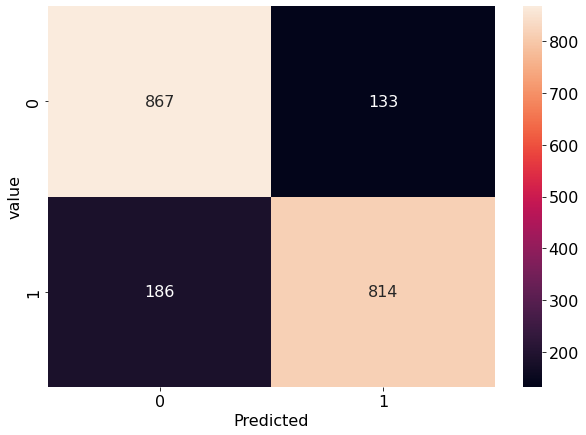

Unique: [1 2]		Counts: [1053  947]


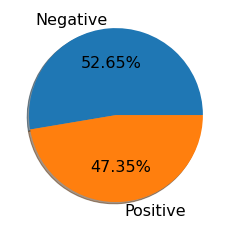

In [45]:
pipeline(svm_model_linear, pang_movies)